In [19]:
import numpy as np 
import re
import math 
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [17]:
import math
import re
from math import sqrt

# Lớp TextProcess như đã định nghĩa
class TextProcess:
    def __init__(self, documents):
        self.documents = documents
        self.processed_documents = [self.preprocess_text(doc) for _, doc in documents]
        self.tf_values = [self.compute_tf(doc) for doc in self.processed_documents]
        self.idf_values = self.compute_idf(self.processed_documents)
        self.tfidf_matrix = self.compute_tfidf()
    
    def preprocess_text(self, text):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text.split()

    def compute_tf(self, words):
        tf = {}
        total_words = len(words)
        for word in words:
            tf[word] = tf.get(word, 0) + 1
        return {word: count / total_words for word, count in tf.items()}

    def compute_idf(self, documents):
        idf = {}
        total_documents = len(documents)
        word_doc_count = {}

        for doc in documents:
            words = set(doc)  
            for word in words:
                word_doc_count[word] = word_doc_count.get(word, 0) + 1
        
        for word, count in word_doc_count.items():
            idf[word] = math.log(total_documents / (1 + count))  
        return idf

    def compute_tfidf(self):
        tfidf_matrix = []
        for tf in self.tf_values:
            tfidf_vector = {word: tf.get(word, 0) * self.idf_values.get(word, 0) for word in tf}
            tfidf_matrix.append(tfidf_vector)
        return tfidf_matrix

    def cosine_similarity(self, tfidf_vector_1, tfidf_vector_2):
        dot_product = sum(tfidf_vector_1.get(word, 0) * tfidf_vector_2.get(word, 0) for word in set(tfidf_vector_1) | set(tfidf_vector_2))
        magnitude_1 = sqrt(sum(val**2 for val in tfidf_vector_1.values()))
        magnitude_2 = sqrt(sum(val**2 for val in tfidf_vector_2.values()))
        
        if magnitude_1 == 0 or magnitude_2 == 0:
            return 0
        return dot_product / (magnitude_1 * magnitude_2)

    def compute_similarity_matrix(self):
        num_docs = len(self.tfidf_matrix)
        similarity_matrix = [[0] * num_docs for _ in range(num_docs)]
        
        for i in range(num_docs):
            for j in range(i, num_docs):
                sim = self.cosine_similarity(self.tfidf_matrix[i], self.tfidf_matrix[j])
                similarity_matrix[i][j] = sim
                similarity_matrix[j][i] = sim
        
        return similarity_matrix






In [15]:
sample_docs = [
    ("Bài luận 1", "Trí tuệ nhân tạo đang phát triển nhanh chóng và tác động lớn đến cuộc sống."),
    ("Bài luận 2", "Trí tuệ nhân tạo đang phát triển mạnh mẽ và ảnh hưởng nhiều đến đời sống con người."),
    ("Bài luận 3", "Trí tuệ nhân tạo rất mạnh mẽ và ảnh hưởng nhiều đến đời sống con người."),
    ("Bài luận 4", "Deep Learning đã mang lại những bước tiến vượt bậc trong lĩnh vực xử lý ngôn ngữ tự nhiên."),
    ("Bài luận 5", "Robotics và tự động hóa đang thay đổi cách chúng ta làm việc trong các nhà máy."),
    ("Bài luận 6", "Internet of Things kết nối hàng tỷ thiết bị thông minh trên toàn cầu."),
    ("Bài luận 7", "Blockchain không chỉ dùng cho tiền điện tử mà còn nhiều ứng dụng khác."),
    ("Bài luận 8", "Cloud Computing giúp doanh nghiệp tiết kiệm chi phí và tăng hiệu quả."),
    ("Bài luận 9", "Bảo mật thông tin là thách thức lớn trong kỷ nguyên số."),
    ("Bài luận 10", "5G sẽ tạo ra cuộc cách mạng trong truyền thông di động.")
]


In [16]:

# Tạo đối tượng TextProcess
tp = TextProcess(sample_docs)

# Tính toán ma trận độ tương đồng
similarity_matrix = tp.compute_similarity_matrix()

# In ra ma trận độ tương đồng
for row in similarity_matrix:
    print(row)


[1.0, 0.4355497065308006, 0.25547722868198325, 0.0, 0.0742583674987998, 0.0, 0.0, 0.010373443329301592, 0.06317117539220353, 0.13425446682502154]
[0.4355497065308006, 1.0, 0.8346130825784938, 0.0, 0.04267959997027519, 0.0, 0.03222788494315205, 0.01051051601927282, 0.0, 0.023597442332870602]
[0.25547722868198325, 0.8346130825784938, 1.0000000000000002, 0.0, 0.010428693615323037, 0.0, 0.03321226631365867, 0.010831553412264447, 0.0, 0.02431821202238192]
[0.0, 0.0, 0.0, 1.0, 0.048955754078876645, 0.0, 0.0, 0.0, 0.013876035867201804, 0.015434505570140901]
[0.0742583674987998, 0.04267959997027519, 0.010428693615323037, 0.048955754078876645, 1.0, 0.0, 0.0, 0.008015380953959173, 0.016178481445216542, 0.10373611367149302]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.02798341957624602, 0.03112634252712239]
[0.0, 0.03222788494315205, 0.03321226631365867, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.010373443329301592, 0.01051051601927282, 0.010831553412264447, 0.0, 0.008015380953959173, 0.0, 0.0, 0.999999

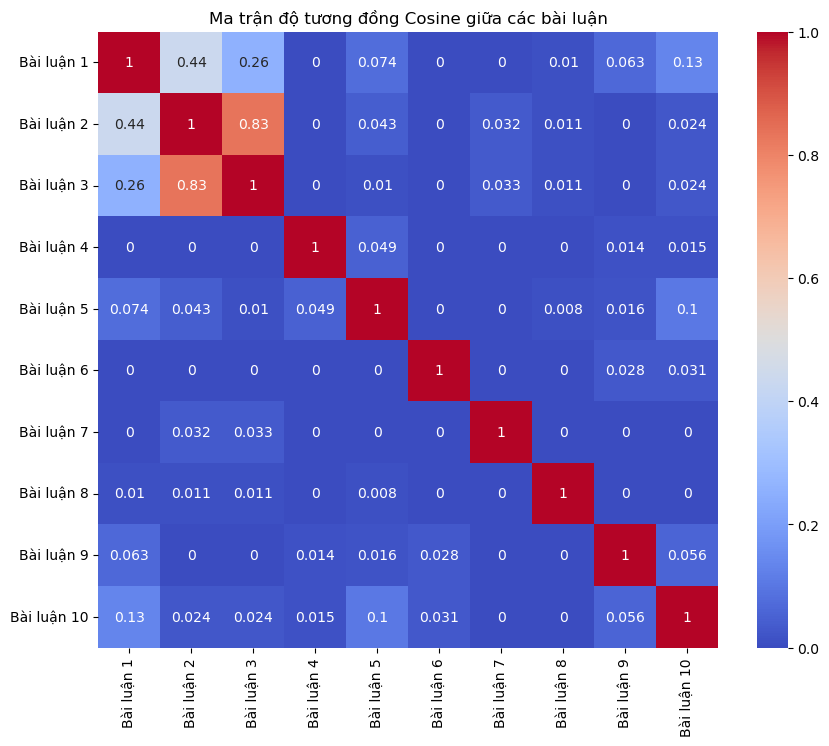

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", xticklabels=[doc[0] for doc in sample_docs], yticklabels=[doc[0] for doc in sample_docs])
plt.title("Ma trận độ tương đồng Cosine giữa các bài luận")
plt.show()